In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#df.columns

In [2]:
# remove the 0 category which corresponds to all categories
df = pd.read_json('cache.json')
all_df = {}
all_cms_df = {}
for state in df.columns:
    columns = []
    a1 = []
    a2 = []
    a3 = []
    a4 = []
    a5 = []
    a6 = []
    a7 = []
    a8 = []
    a9 = []
    a10 = []

    all_cms_df[state] = pd.DataFrame(df[state]['cms_array'])

    for idx, row in enumerate(df[state]['census_data']):
        if idx==0:
            columns = [item for item in row]
        else:
            for item in row:
                a1.append(item[0])
                a2.append(item[1])
                a3.append(item[2])
                a4.append(item[3])
                a5.append(item[4])
                a6.append(item[5])
                a7.append(item[6])
                a8.append(item[7])
                a9.append(item[8])
                a10.append(item[9])
    temp_df = pd.DataFrame({'a1':a1, 'a2':a2, 'a3':a3, 'a4':a4, 'a5':a5, 'a6':a6, 'a7':a7, 'a8':a8, 'a9':a9, 'a10':a10})
    temp_df.columns = columns
    all_df[state] = temp_df

for state in df.columns:
    agecat = {"0":"Under 65","1":"18-64","2":"40-64","3":"50-64","4":"Under 19","5":"21-64"}
    all_df[state]['AGECAT'] = all_df[state]['AGECAT'].map(agecat)

    racecat = {"0":"All races","1":"White","2":"Black","3":"Hispanic"}
    all_df[state]['RACECAT'] = all_df[state]['RACECAT'].map(racecat)

    iprcat = {"0":"All income levels","1":"At or below 200 pct of poverty","2":"At or below 250 pct of poverty","3":"At or below 138 pct of poverty", "4":"At or below 400 pct of poverty","5":"Between 138 and 400 pct of poverty"}
    all_df[state]['IPRCAT'] = all_df[state]['IPRCAT'].map(iprcat)

In [3]:
all_cms_df['MI']

,name,abbrev,fiscal_year,fiscal_quarter,pc_fpl_parent,pc_fpl_pregnant,pc_fpl_adult,pc_fpl_child_newborn,pc_fpl_child_1_5,pc_fpl_child_6_18,low_income_child,chip
0,MICHIGAN,MI,2016,4,0.54,1.95,1.33,1.95,1.6,1.6,"[{'min_age': 0, 'max_age': 18, 'pc_fpl': 2.12}]",[]
1,MICHIGAN,MI,2017,4,0.54,1.95,1.33,1.95,1.6,1.6,"[{'min_age': 0, 'max_age': 18, 'pc_fpl': 2.12}]",[]
2,MICHIGAN,MI,2018,4,0.54,1.95,1.33,1.95,1.6,1.6,"[{'min_age': 0, 'max_age': 18, 'pc_fpl': 2.12}]",[]
3,MICHIGAN,MI,2019,4,0.54,1.95,1.33,1.95,1.6,1.6,"[{'min_age': 0, 'max_age': 18, 'pc_fpl': 2.12}]",[]
4,MICHIGAN,MI,2020,4,0.54,1.95,1.33,1.95,1.6,1.6,"[{'min_age': 0, 'max_age': 18, 'pc_fpl': 2.12}]",[]


#make similar changes for racecat, iprcat 

In [4]:
state='MI'
temp = all_df[state][all_df[state]['time']=='2010'][['AGECAT','NUI_PT']]

temp['NUI_PT'] = temp['NUI_PT'].astype(float)

In [5]:
temp1 = all_df[state][all_df[state]['time']=='2010'][['RACECAT','NUI_PT']]

temp1['NUI_PT'] = temp['NUI_PT'].astype(float)

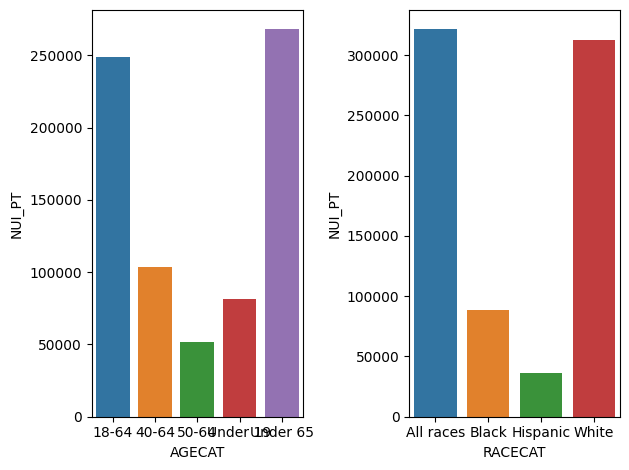

In [7]:
fig, (ax1,ax2) = plt.subplots(1,2)
sns.barplot(data=temp.groupby('AGECAT').median().reset_index(),x='AGECAT',y='NUI_PT',ax=ax1)
sns.barplot(data=temp1.groupby('RACECAT').median().reset_index(),x='RACECAT',y='NUI_PT',ax=ax2)
fig.tight_layout()

In [6]:
import plotly.express as px

fig = px.bar(data_frame=temp.groupby('AGECAT').median().reset_index(),
             x='AGECAT',
             y='NUI_PT',
             color='AGECAT',
             title='Age vs. NUI_PT')
fig.update_layout(showlegend=False)

fig2 = px.bar(data_frame=temp1.groupby('RACECAT').median().reset_index(),
              x='RACECAT',
              y='NUI_PT',
              color='RACECAT',
              title='Race vs. NUI_PT')
fig2.update_layout(showlegend=False)

fig.show()
fig2.show()

In [7]:
for key in all_df.keys():
    print(len(all_df[key]))
print('================================')
for key in all_cms_df.keys():
    print(len(all_cms_df[key]))

1426
1426
1426
1426
5
5
5
5
